## Evaluation of the Stresser Model

In [9]:
import pandas as pd
import json
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Distribution of words in full data set

In [10]:
full = json.load(open("./data/stresses.json", "r"))
print(len(full))

25853


One-syll words in full dataset: 2564
Two-syll words in full dataset: 8909
Three-syll words in full dataset: 8791
Four-syll words in full dataset: 4130
Five-syll words in full dataset: 1330
Six-syll words in full dataset: 128
Seven-syll words in full dataset: 1


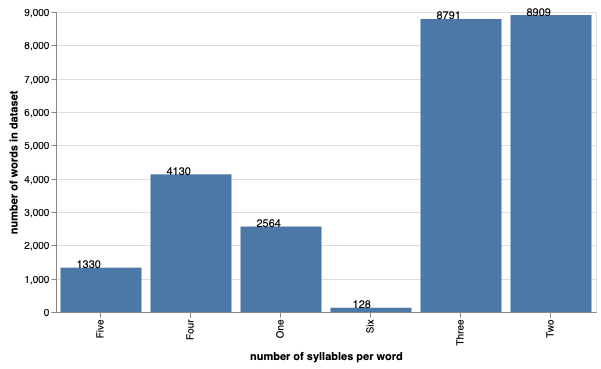

In [11]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)

#print(syllabified_words)
#print(number_of_sylls)

print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))


source = pd.DataFrame({
    'number of syllables per word': ['One', 'Two', 'Three', 'Four', 'Five', 'Six'],
    'number of words in dataset': [number_of_sylls.count(1), number_of_sylls.count(2),
          number_of_sylls.count(3), number_of_sylls.count(4), 
          number_of_sylls.count(5), number_of_sylls.count(6)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of syllables per word',
    y='number of words in dataset')

text = chart.mark_text(
    align='right'
).encode(
    text='number of words in dataset'
)

chart + text

#### Loading gold and silver datasets for evaluation

In [12]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [13]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 2586
Total number of words in silver: 2586


#### General comparison between gold and silver dataframes

In [14]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'on-ghe-int', 'in-ho-ne-stas', 'jo-a-chim', 'e-rent-rijck', 'yli-oen', 'suc-ce-de-ren', 'thoechout-wou-de', 'pen-thi-se-le-ye', 'me-ne-stre-le', 'am-bas-siaet', 'o-res-tes', 'mes-la-ten', 'vloy-ec-he-de', 'ghe-dec-la-reert', 'in-digna-ti-en', 'ta-ven-ioen', 'lants-vrou-wen', 'as-sue-rus', 'car-nat-ioen', 'y-li-oen', 'don-re-slach', 'joa-chim', 'e-li-a-ne', 'vlee-schou-wer-stra-te', 'pal-la-di-oen', 'pen-thi-se-le-y-e', 'temp-ta-cie', 'blijs-ca-pen', 'ty-en', 'aen-cle-ven', 'me-sla-ten', 'vlees-chou-wer-stra-te', 'on-teer-de', 'ser-iant', 'oest-ri-ke', 'ja-nu-a-re', 'oc-tou-ia-ne', 'pel-ioen', 'clo-di-en', 'hys-to-rie', 'on-mo-gent-he-de', 'tra-del-iant', 'o-re-stes', 'ont-er-ven', 'ghe-int', 'wul-fram', 'ont-farm-her-tic-heit', 'pal-lad-ioen', 'lant-svrou-wen', 'gheint', 'ys-tor-ia-le', 'joan-ne', 'cel-ioen', 'pro-vin-ci-a-le', 'li-cenc-ieert', 'ga-li-e-nus', 'toe-spre-ken', 'in-dig-na-ti-en', 'me-nestre-le', 'ii-ii', 'on-mo-g

In [15]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     2518
False      68
dtype: int64


#### Print dataframe with mistakes

In [16]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,oc-tou-ia-ne,oc-to-ui-a-ne
False,ver-ees-che,ver-ee-sche
False,ghe-de-cla-reert,ghe-dec-la-reert
False,ver-sma-de,vers-ma-de
False,ont-farm-her-tic-heit,ont-farmher-tic-heit
False,in-ho-ne-stas,in-ho-nes-tas
False,o-res-tes,o-re-stes
False,me-ne-stre-le,me-nestre-le
False,car-nat-ioen,car-nati-oen


#### Expand dataframe with information about syllable counts

In [17]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 39 (out of a total of 2586 words).


#### Calculate accuracy for mono- and polysyllable words

In [18]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 282 Mistakes: 2
Total number of 2syllabic words: 861 Mistakes: 6
Total number of 3syllabic words: 921 Mistakes: 9
Total number of 4syllabic words: 398 Mistakes: 17
Total number of 5syllabic words: 111 Mistakes: 5
Total number of 6syllabic words: 13 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 99.99290780141844
Accuracy syllabification of two-syllable words: 99.99303135888502
Accuracy syllabification of three-syllable words: 99.99022801302931
Accuracy syllabification of four-syllable words: 99.9572864321608
Accuracy syllabification of five-syllable words: 99.95495495495496
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!


#### Analysis of stress pattern predictions

In [19]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold_human_annotation = [value["human_annotation"] for value in gold]
items_gold_corrected_stress = [value["corrected_stress"] for value in gold]
items__gold_patterns = [value["patterns"] for value in gold]


print(items_gold_human_annotation)
#for d in items_gold_human_annotation.values():
 #   if d is not None:
  #      print(d)
        

#human annotation
#corrected_stress
#patterns

#srtress_silver = [value["syllabified"] for value in silver]

[None, -3, None, None, None, None, [-4, -2], None, None, None, None, None, -2, -2, [-4, -2], None, [-4, -2], None, None, None, None, None, -2, None, None, [-4, -2], None, None, None, [-4, -2], None, -3, None, None, -2, None, [-4, -1], None, [-3, -1], None, None, -2, [-3, -1], None, None, None, None, -2, [-4, -2], None, None, None, None, None, -2, [-5, -2], None, [-3, -1], None, None, None, None, None, None, None, None, None, None, None, [-4, -2], None, [-4, -2], [-3, -1], [-3, -1], [-3, -1], None, [-3, -1], None, None, None, [-3, -1], None, None, -2, None, None, None, [-3, -1], None, None, None, None, None, None, None, None, [-3, -1], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, -2, None, [-3, -1], None, None, None, None, -2, None, None, [-4, -2], None, None, None, None, None, None, None, None, None, [-3, -1], [-3, -1], None, None, [-3, -1], None, None, None, None, None, None, None, None, None, None, None, None, -3, [-4, -2], None, None, Non